<a href="https://colab.research.google.com/github/MatthewBabajide/FirstColab/blob/master/Linear_Regression_using_Energy_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics, preprocessing
from scipy import stats

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_energy = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")
df_energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
column_names = {"date": "Date", "Appliances": "Appliances (Wh)", "lights": "Lights (Wh)", "T1": "Kitchen Temperature", "RH_1": "Kitchen Humidity",
                "T2": "Living Room Temperature", "RH_2": "Living Room Humidity", "T3": "Laundry Room Temperature", "RH_3": "Laundry Room Humidity",
                "T4": "Office Temperature", "RH_4": "Office Humidity", "T5": "Bathroom Temperature", "RH_5": "Bathroom Humidity",
                "T6": "Outside Building Temperature (North Side)", "RH_6": "Outside Building Humidity (North Side)", "T7": "Ironing Room Temperature", "RH_7": "Ironing Room Humidity",
                "T8": "Teenager Room_2 Temperature", "RH_8": "Teenager Room_2 Humidity", "T9": "Parents Room Temperature", "RH_9": "Parents Room Humidity",
                "T_out": "Outside Temperature (from CWS)", "Press_mm_hg": "Pressure mm_Hg (from CWS)", "RH_out": "Outside Humidity (from CWS)", "Windspeed": "Wind speed (m/s)(from CWS)",
                "Visibility": "Visibility (km)(from CWS)", "Tdewpoint": "Tdewpoint (from CWS)", "rv1": "Random variable 1", "rv2": "Random variable 2"
}

In [ ]:
df_energy = df_energy.rename(columns = column_names)
df_energy.head()

,Date,Appliances (Wh),Lights (Wh),Kitchen Temperature,Kitchen Humidity,Living Room Temperature,Living Room Humidity,Laundry Room Temperature,Laundry Room Humidity,Office Temperature,Office Humidity,Bathroom Temperature,Bathroom Humidity,Outside Building Temperature (North Side),Outside Building Humidity (North Side),Ironing Room Temperature,Ironing Room Humidity,Teenager Room_2 Temperature,Teenager Room_2 Humidity,Parents Room Temperature,Parents Room Humidity,Outside Temperature (from CWS),Pressure mm_Hg (from CWS),Outside Humidity (from CWS),Wind speed (m/s)(from CWS),Visibility (km)(from CWS),Tdewpoint (from CWS),Random variable 1,Random variable 2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date                                       19735 non-null  object 
 1   Appliances (Wh)                            19735 non-null  int64  
 2   Lights (Wh)                                19735 non-null  int64  
 3   Kitchen Temperature                        19735 non-null  float64
 4   Kitchen Humidity                           19735 non-null  float64
 5   Living Room Temperature                    19735 non-null  float64
 6   Living Room Humidity                       19735 non-null  float64
 7   Laundry Room Temperature                   19735 non-null  float64
 8   Laundry Room Humidity                      19735 non-null  float64
 9   Office Temperature                         19735 non-null  float64
 10  Office Humidity       

In [ ]:
df_energy.describe()

,Appliances (Wh),Lights (Wh),Kitchen Temperature,Kitchen Humidity,Living Room Temperature,Living Room Humidity,Laundry Room Temperature,Laundry Room Humidity,Office Temperature,Office Humidity,Bathroom Temperature,Bathroom Humidity,Outside Building Temperature (North Side),Outside Building Humidity (North Side),Ironing Room Temperature,Ironing Room Humidity,Teenager Room_2 Temperature,Teenager Room_2 Humidity,Parents Room Temperature,Parents Room Humidity,Outside Temperature (from CWS),Pressure mm_Hg (from CWS),Outside Humidity (from CWS),Wind speed (m/s)(from CWS),Visibility (km)(from CWS),Tdewpoint (from CWS),Random variable 1,Random variable 2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
df_energy.corr()

,Appliances (Wh),Lights (Wh),Kitchen Temperature,Kitchen Humidity,Living Room Temperature,Living Room Humidity,Laundry Room Temperature,Laundry Room Humidity,Office Temperature,Office Humidity,Bathroom Temperature,Bathroom Humidity,Outside Building Temperature (North Side),Outside Building Humidity (North Side),Ironing Room Temperature,Ironing Room Humidity,Teenager Room_2 Temperature,Teenager Room_2 Humidity,Parents Room Temperature,Parents Room Humidity,Outside Temperature (from CWS),Pressure mm_Hg (from CWS),Outside Humidity (from CWS),Wind speed (m/s)(from CWS),Visibility (km)(from CWS),Tdewpoint (from CWS),Random variable 1,Random variable 2
Appliances (Wh),1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
Lights (Wh),0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,-0.078745,0.141233,-0.079029,0.153756,-0.135347,0.035069,-0.071458,0.012915,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
Kitchen Temperature,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
Kitchen Humidity,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
Living Room Temperature,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
Living Room Humidity,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
Laundry Room Temperature,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
Laundry Room Humidity,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
Office Temperature,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
Office Humidity,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [ ]:
#sns.pairplot(subdf_energy)

In [ ]:
df_energy.columns

Index(['Date', 'Appliances (Wh)', 'Lights (Wh)', 'Kitchen Temperature',
       'Kitchen Humidity', 'Living Room Temperature', 'Living Room Humidity',
       'Laundry Room Temperature', 'Laundry Room Humidity',
       'Office Temperature', 'Office Humidity', 'Bathroom Temperature',
       'Bathroom Humidity', 'Outside Building Temperature (North Side)',
       'Outside Building Humidity (North Side)', 'Ironing Room Temperature',
       'Ironing Room Humidity', 'Teenager Room_2 Temperature',
       'Teenager Room_2 Humidity', 'Parents Room Temperature',
       'Parents Room Humidity', 'Outside Temperature (from CWS)',
       'Pressure mm_Hg (from CWS)', 'Outside Humidity (from CWS)',
       'Wind speed (m/s)(from CWS)', 'Visibility (km)(from CWS)',
       'Tdewpoint (from CWS)', 'Random variable 1', 'Random variable 2'],
      dtype='object')

In [ ]:
scaler = preprocessing.MinMaxScaler()

In [ ]:
subdf_energy = df_energy[['Appliances (Wh)', 'Kitchen Temperature',
       'Kitchen Humidity', 'Living Room Temperature', 'Living Room Humidity',
       'Laundry Room Temperature', 'Laundry Room Humidity',
       'Office Temperature', 'Office Humidity', 'Bathroom Temperature',
       'Bathroom Humidity', 'Outside Building Temperature (North Side)',
       'Outside Building Humidity (North Side)', 'Ironing Room Temperature',
       'Ironing Room Humidity', 'Teenager Room_2 Temperature',
       'Teenager Room_2 Humidity', 'Parents Room Temperature',
       'Parents Room Humidity', 'Outside Temperature (from CWS)',
       'Pressure mm_Hg (from CWS)', 'Outside Humidity (from CWS)',
       'Wind speed (m/s)(from CWS)', 'Visibility (km)(from CWS)',
       'Tdewpoint (from CWS)', 'Random variable 1', 'Random variable 2']]
subdf_energy

,Appliances (Wh),Kitchen Temperature,Kitchen Humidity,Living Room Temperature,Living Room Humidity,Laundry Room Temperature,Laundry Room Humidity,Office Temperature,Office Humidity,Bathroom Temperature,Bathroom Humidity,Outside Building Temperature (North Side),Outside Building Humidity (North Side),Ironing Room Temperature,Ironing Room Humidity,Teenager Room_2 Temperature,Teenager Room_2 Humidity,Parents Room Temperature,Parents Room Humidity,Outside Temperature (from CWS),Pressure mm_Hg (from CWS),Outside Humidity (from CWS),Wind speed (m/s)(from CWS),Visibility (km)(from CWS),Tdewpoint (from CWS),Random variable 1,Random variable 2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [ ]:
normalised_df = pd.DataFrame(scaler.fit_transform(subdf_energy), columns = subdf_energy.columns)
features = normalised_df.drop(columns = ["Appliances (Wh)"])
target_var = normalised_df["Appliances (Wh)"]

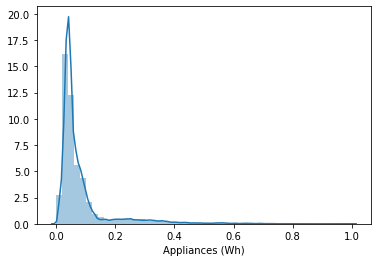

In [ ]:
sns.distplot(normalised_df["Appliances (Wh)"])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = normalised_df[['Kitchen Temperature',
       'Kitchen Humidity', 'Living Room Temperature', 'Living Room Humidity',
       'Laundry Room Temperature', 'Laundry Room Humidity',
       'Office Temperature', 'Office Humidity', 'Bathroom Temperature',
       'Bathroom Humidity', 'Outside Building Temperature (North Side)',
       'Outside Building Humidity (North Side)', 'Ironing Room Temperature',
       'Ironing Room Humidity', 'Teenager Room_2 Temperature',
       'Teenager Room_2 Humidity', 'Parents Room Temperature',
       'Parents Room Humidity', 'Outside Temperature (from CWS)',
       'Pressure mm_Hg (from CWS)', 'Outside Humidity (from CWS)',
       'Wind speed (m/s)(from CWS)', 'Visibility (km)(from CWS)',
       'Tdewpoint (from CWS)', 'Random variable 1', 'Random variable 2']]
y = normalised_df["Appliances (Wh)"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
lm = LinearRegression()


In [ ]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)
print(lm.coef_)

0.1529029588225302
[-0.00328105  0.5535466  -0.23617792 -0.45669795  0.29062714  0.09604827
  0.028981    0.02638578 -0.01565684  0.01600579  0.23642491  0.03804865
  0.01031878 -0.04461364  0.10199505 -0.15759548 -0.18994077 -0.03980032
 -0.32185967  0.00683933 -0.07767065  0.02918313  0.01230661  0.11775773
  0.0007701   0.0007701 ]


In [ ]:
X_train.columns

Index(['Kitchen Temperature', 'Kitchen Humidity', 'Living Room Temperature',
       'Living Room Humidity', 'Laundry Room Temperature',
       'Laundry Room Humidity', 'Office Temperature', 'Office Humidity',
       'Bathroom Temperature', 'Bathroom Humidity',
       'Outside Building Temperature (North Side)',
       'Outside Building Humidity (North Side)', 'Ironing Room Temperature',
       'Ironing Room Humidity', 'Teenager Room_2 Temperature',
       'Teenager Room_2 Humidity', 'Parents Room Temperature',
       'Parents Room Humidity', 'Outside Temperature (from CWS)',
       'Pressure mm_Hg (from CWS)', 'Outside Humidity (from CWS)',
       'Wind speed (m/s)(from CWS)', 'Visibility (km)(from CWS)',
       'Tdewpoint (from CWS)', 'Random variable 1', 'Random variable 2'],
      dtype='object')

In [ ]:
pd.DataFrame(lm.coef_, X_train.columns, columns =["Coefficient"])

,Coefficient
Kitchen Temperature,-0.003281
Kitchen Humidity,0.553547
Living Room Temperature,-0.236178
Living Room Humidity,-0.456698
Laundry Room Temperature,0.290627
Laundry Room Humidity,0.096048
Office Temperature,0.028981
Office Humidity,0.026386
Bathroom Temperature,-0.015657
Bathroom Humidity,0.016006


In [ ]:
prediction = lm.predict(X_test)
prediction

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [ ]:
y_test

8980     0.028037
2754     0.074766
9132     0.037383
14359    0.037383
8875     0.056075
           ...   
831      0.224299
10993    0.046729
11761    0.037383
12364    0.093458
11863    0.037383
Name: Appliances (Wh), Length: 5921, dtype: float64

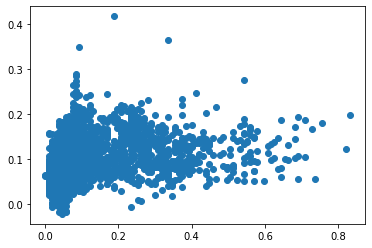

In [ ]:
plt.scatter(y_test, prediction)

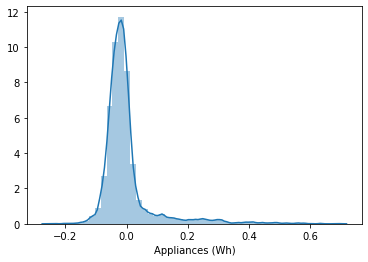

In [ ]:
sns.distplot((y_test - prediction), bins = 50)

In [ ]:
print ("The MAE is: ", metrics.mean_absolute_error(y_test, prediction))
print ("The MSE is: ", metrics.mean_squared_error(y_test, prediction))
print ("The RMSE is: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print ("The R^2 is: ", metrics.r2_score(y_test, prediction))
print ("The RSS is: ", np.sum(np.square(y_test, prediction)))

The MAE is:  0.05013362397742955
The MSE is:  0.007658778867195367
The RMSE is:  0.0875144494766171
The R^2 is:  0.14890246319303535
The RSS is:  92.98410341514544


In [ ]:
ridge_reg = Ridge(alpha = 0.5)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge_pred = ridge_reg.predict(X_test)

print ("The MAE is: ", metrics.mean_absolute_error(y_test, ridge_pred))
print ("The MSE is: ", metrics.mean_squared_error(y_test, ridge_pred))
print ("The RMSE is: ", np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print ("The R^2 is: ", metrics.r2_score(y_test, ridge_pred))
print ("The RSS is: ", np.sum(np.square(y_test, ridge_pred)))

The MAE is:  0.05008190949570016
The MSE is:  0.00766345923024565
The RMSE is:  0.08754118590838057
The R^2 is:  0.14838234823312713
The RSS is:  92.98410341514544


In [ ]:
lasso_reg = Lasso (alpha = 0.01)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_pred = lasso_reg.predict(X_test)

print ("The MAE is: ", metrics.mean_absolute_error(y_test, lasso_pred))
print ("The MSE is: ", metrics.mean_squared_error(y_test, lasso_pred))
print ("The RMSE is: ", np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))
print ("The R^2 is: ", metrics.r2_score(y_test, lasso_pred))
print ("The RSS is: ", np.sum(np.square(y_test, lasso_pred)))

The MAE is:  0.05652328012499732
The MSE is:  0.008998719149892167
The RMSE is:  0.09486157889204758
The R^2 is:  -1.1536689688007584e-06
The RSS is:  92.98410341514544


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X_ = PolynomialFeatures(degree = 3, include_bias = False).fit_transform(X)

In [ ]:
Poly_model = lm.fit(X_, y)

In [ ]:
r_2 = Poly_model.score(X_, y)
print("The coefficient of determination is ", r_2)
print("The coefficients are ", Poly_model.coef_)
print("The intercept is ", Poly_model.intercept_)

The coefficient of determination is  0.6762741546047242
The coefficients are  [ 1.05768160e+02  1.89283298e+01 -4.60671455e+01 ... -2.54269242e-03
 -2.54269368e-03 -2.54269416e-03]
The intercept is  -32.27036108863621


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.3, random_state = 42)

In [ ]:
#test_model = lm.fit(X_train, y_train)

In [ ]:
#print("The coefficients are ", lm.coef_)
#print("The intercept is ", lm.intercept_)

In [ ]:
pred = Poly_model.predict(X_)

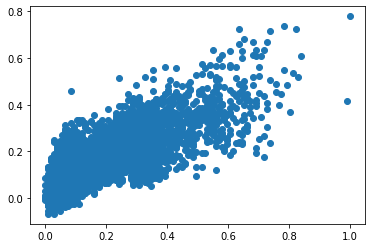

In [ ]:
plt.scatter(y, pred)